In [1]:
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
from keras.utils import np_utils

import numpy as np
from keras.datasets import mnist



Using TensorFlow backend.


# Mnist: classification de chiffres manuscrits

Dans ce TD, nous allons tenter de reconnaître des chiffres manuscrits avec différents algorithmes de machine learning, à l'aide de la librairie python sklearn.

## Téléchargement des données

In [2]:
(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()


11493376/11490434 [==============================] - 22s 2us/step


## Aperçu des données

In [3]:
print("nombre d'image en entrée ",X_train_base.shape,X_test_base.shape)
print("taille sortie",y_train_base.shape,y_test_base.shape)
print(y_train_base[0:10],"les sorties des 10 premieres images")



nombre d'image en entrée  (60000, 28, 28) (10000, 28, 28)
taille sortie (60000,) (10000,)
[5 0 4 1 9 2 1 3 1 4] les sorties des 10 premieres images


Et pour la première image :

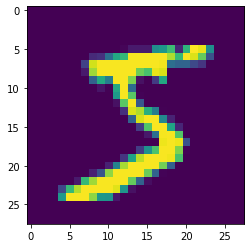

In [4]:
plt.imshow(X_train_base[0])


## Visualisation des données

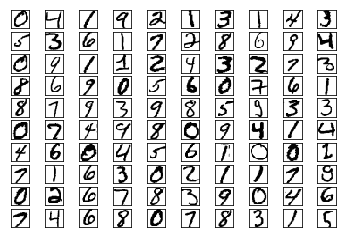

In [5]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            ax.matshow(images[10*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

plot_10_by_10_images(X_train_base)

## Aplatir les images
Les modèles de ML classiques ne prennet pas en compte l'aspect spatial des données. Il est nécessaire d'envoyer l'image sous forme de vecteur pour qu'elle soit reconnue à  l'entrée du modèle 

In [6]:
nb_classes=10
X_train = X_train_base.reshape(60000, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = y_train_base
y_test = y_test_base

In [7]:
print(X_train_base.shape)
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


## Création d'un modèle linéaire

In [8]:
import sklearn.linear_model

model=sklearn.linear_model.LogisticRegression()
model.fit(X_train,y_train) #trou

/Users/cecile/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
predictions=model.predict(X_test) #trou
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predictions,y_test)
print(accuracy)

0.9256


Notre baseline est de 92% de taux de bonnes predictions. 

## Test du modèle  Random Forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=7,verbose=1,max_features=10)
model.fit(X_train,y_train) 
predictions=model.predict(X_test)
accuracy=accuracy_score(predictions,y_test) #trou
print(accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9287


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


- A faire : modifier les paramètres de RandomForestClassifier pour améliorer le score. Il est au moins possible d'arriver à 97% en changeant juste les valeurs de n_estimators et max_features.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Test du Support Vector Machine(svm)

- présentation du svm

In [12]:
from sklearn import svm
model=svm.SVC(C=1.0, kernel="rbf", degree=3)
model.fit(X_train,y_train) 
predictions=model.predict(X_test)
accuracy=accuracy_score(predictions,y_test)
print(accuracy)

0.9792


- A faire : modifier les paramètres de svm.SVC pour améliorer le score. Il est au moins possible d'arriver à 95%.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Conclusion
- bonnes predictions pour les modèles de ML classiques
- scores toujours en dessous d'un être humain
- score qui continuera à descendre plus on augmente la taille des images

## Bonus
- visualiser les échantillons où le modèle s'est trompé de beaucoup